# Neural network

In [2]:
!pip install tensorflow
!pip install pandas scikit-learn 
!pip install keras
!pip install numpy

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     --------------------------------- ---- 41.0/46.2 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 46.2/46.2 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB 991.0 kB/s eta 0:06:21
   ---------------------------------------- 0.1/377.0 MB 1.1 MB/s eta 0:05:46
   ---------------------------------------- 0.2/377.0 MB 1.1 MB/s eta 0:05:29
   ---------------------------------------- 0.2/377.0 MB 1.1 MB/s eta 0:05:34
   ---------------------------------------- 0.3/377.0 MB 1.1 MB/s eta 0:05:36
   ---------------------------------------- 0.3/377.0 MB 1.1 MB/s eta 0:05:37
   ---------------------------------------- 0.4/377.0 MB 1.1 MB/s eta 0:05:28
   ---------------------------------------- 0.4/377.0 MB 1.1 MB/s eta 0:05:33
   ---------------------------------------- 0.4/377.0 MB 1.0 MB/s eta 0

In [ ]:
!pip install --user --force-reinstall tensorflow==2.13.0
!pip install --user --force-reinstall pandas scikit-learn 
!pip install --user --force-reinstall keras==2.13.1
!pip install --user --force-reinstall numpy==1.24.3

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense


#insert file_path for the data
#file_path = 'H:/Documents/Merged data ANN.xlsx'
file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/Merged data ANN.xlsx'
#file_path = 'H:/Documents/FINAL_MERGED_DATASET.xlsx'
#read data, and quickly check if it is correctly read in
data= pd.read_excel(file_path)
# Load the data from Excel

#data.drop(columns=["date"], inplace=True)

In [6]:
file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/FINAL_MERGED_DATASET.xlsx'
oot_data = pd.read_excel(file_path)

In [10]:
oot_data_copy = oot_data.copy()

# Recurrent Neural Network

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense



# Separate features and target variable
#X = data.drop(columns=["price"])  # Features
#y = data["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape features into sequences for RNN
n_steps = 3  # You can adjust this number based on your preference
X_train_seq = np.array([X_train_scaled[i:i+n_steps, :] for i in range(len(X_train_scaled) - n_steps + 1)])
X_test_seq = np.array([X_test_scaled[i:i+n_steps, :] for i in range(len(X_test_scaled) - n_steps + 1)])

# Reshape target variable accordingly
y_train_seq = y_train[n_steps - 1:]
y_test_seq = y_test[n_steps - 1:]

# Build the RNN model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(n_steps, X_train_scaled.shape[1])))

# Add another LSTM layer
model.add(LSTM(units=64, activation='relu'))

# Add additional dense layers
model.add(Dense(units=32, activation='relu'))  # You can adjust the number of units and activation function as needed
model.add(Dense(units=16, activation='relu'))  # Another dense layer for further abstraction


model.add(Dense(units=1))  # Output layer, no activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test_seq)

# Additional evaluation metrics
mse = mean_squared_error(y_test_seq, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Epoch 1/50
4059/4059 [==============================] - 19s 4ms/step - loss: 5174.7700 - mse: 5174.7700
Epoch 2/50
4059/4059 [==============================] - 16s 4ms/step - loss: 3810.3223 - mse: 3810.3223
Epoch 3/50
4059/4059 [==============================] - 16s 4ms/step - loss: 3399.0327 - mse: 3399.0327
Epoch 4/50
4059/4059 [==============================] - 16s 4ms/step - loss: 3004.2288 - mse: 3004.2288
Epoch 5/50
4059/4059 [==============================] - 16s 4ms/step - loss: 2676.6230 - mse: 2676.6230
Epoch 6/50
4059/4059 [==============================] - 16s 4ms/step - loss: 2408.4783 - mse: 2408.4783
Epoch 7/50
4059/4059 [==============================] - 16s 4ms/step - loss: 2179.3594 - mse: 2179.3594
Epoch 8/50
4059/4059 [==============================] - 16s 4ms/step - loss: 2010.5852 - mse: 2010.5852
Epoch 9/50
4059/4059 [==============================] - 16s 4ms/step - loss: 1875.6307 - mse: 1875.6307
Epoch 10/50
4059/4059 [==============================] - 16s 4ms

In [9]:
print("Shapes of input data:")
print("X_train_spatial_cnn:", X_train_spatial_cnn.shape)
print("X_test_spatial_cnn:", X_test_spatial_cnn.shape)
print("X_train_temporal_rnn:", X_train_temporal_rnn.shape)
print("X_test_temporal_rnn:", X_test_temporal_rnn.shape)


Shapes of input data:
X_train_spatial_cnn: (129876, 1, 27)
X_test_spatial_cnn: (32469, 1, 27)
X_train_temporal_rnn: (129874, 3, 150)
X_test_temporal_rnn: (32467, 3, 150)


## k-fold cross validation

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming X and y are defined

# Define the number of folds for cross-validation
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics across folds
mse_scores = []
rmse_scores = []
r2_scores = []

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features into sequences for RNN
n_steps = 3  # You can adjust this number based on your preference
X_seq = np.array([X_scaled[i:i+n_steps, :] for i in range(len(X_scaled) - n_steps + 1)])

# Reshape target variable accordingly
y_seq = y[n_steps - 1:]

# Define the RNN model
def build_model():
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(n_steps, X_scaled.shape[1])))
    model.add(LSTM(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_seq):
    X_train, X_test = X_seq[train_index], X_seq[test_index]
    y_train, y_test = y_seq[train_index + n_steps - 1], y_seq[test_index + n_steps - 1]
    
    model = build_model()
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    
    # Evaluate the model
    loss, mse = model.evaluate(X_test, y_test)
    mse_scores.append(mse)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate additional evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate average scores across folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print("Average Mean Squared Error:", avg_mse)
print("Average Root Mean Squared Error:", avg_rmse)
print("Average R-squared:", avg_r2)



Epoch 1/50
3383/3383 [==============================] - 15s 4ms/step - loss: 5262.7319 - mse: 5262.7319
Epoch 2/50
3383/3383 [==============================] - 13s 4ms/step - loss: 3661.1160 - mse: 3661.1160
Epoch 3/50
3383/3383 [==============================] - 13s 4ms/step - loss: 3158.1504 - mse: 3158.1504
Epoch 4/50
3383/3383 [==============================] - 13s 4ms/step - loss: 2757.8481 - mse: 2757.8481
Epoch 5/50
3383/3383 [==============================] - 13s 4ms/step - loss: 2417.3247 - mse: 2417.3247
Epoch 6/50
3383/3383 [==============================] - 13s 4ms/step - loss: 2136.0593 - mse: 2136.0593
Epoch 7/50
3383/3383 [==============================] - 13s 4ms/step - loss: 1937.1409 - mse: 1937.1409
Epoch 8/50
3383/3383 [==============================] - 13s 4ms/step - loss: 1770.3146 - mse: 1770.3146
Epoch 9/50
3383/3383 [==============================] - 13s 4ms/step - loss: 1629.7084 - mse: 1629.7084
Epoch 10/50
3383/3383 [==============================] - 13s 4ms

In [24]:
print("Shape of X_scaled:", X_scaled.shape)
print("First few rows of X_scaled:", X_scaled[:5])


Shape of X_scaled: (162345, 176)
First few rows of X_scaled: [[ 1.46239312e+00 -1.28220372e+00 -4.25865076e-01 -3.52799853e-01
  -3.64403366e-01  4.41902300e-01 -6.40942146e-01  3.98008061e-01
  -7.03876019e-01 -3.75739166e-01 -1.46270238e+00 -7.43749141e-01
  -5.76507590e-01  7.50950627e-01  6.00854768e-02 -1.32826650e-01
  -4.32976607e-02 -1.35949140e-01  9.61813823e-01  2.93523731e+00
   2.92741377e+00  7.65972252e-01  3.78874610e-01  3.57583375e-01
   4.00649973e-01  4.48174901e-01  4.63682713e-01  5.36565940e-01
   4.09797356e-01 -5.38058084e-01 -3.48469746e-01 -3.02039842e-01
  -4.23473586e-01  0.00000000e+00  1.85806171e+00 -4.45054909e-01
   1.48707586e+00  1.30354396e+00 -1.37955491e-01  1.96922876e+00
  -8.07515050e-01  2.19451563e+00 -2.22286854e-01 -1.21246209e-01
  -2.40361712e-01  1.42910234e+00 -1.38418430e-01 -5.64126129e-01
  -2.66161588e-01  2.35928221e-01  9.66455898e-01 -4.59736980e-01
  -6.63704833e-02  5.84346985e-01 -1.23012573e-01 -1.80820798e-01
  -3.52114827e-

## out of time testing

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Assuming 'oot_data_copy' has been loaded and contains the necessary columns

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-09-12')

# Split the dataset based on the cutoff date
train_data = oot_data_copy[oot_data_copy['date'] < cutoff_date]
test_data = oot_data_copy[oot_data_copy['date'] >= cutoff_date]

# Separate features and target variable for training and testing sets
X_train = train_data.drop(columns=['price', 'date'])
y_train = train_data['price']

X_test = test_data.drop(columns=['price', 'date'])
y_test = test_data['price']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape features into sequences for RNN
# This step is specific to RNNs and depends on the sequence length you choose
n_steps = 3  # Length of the input sequences
n_features = X_train_scaled.shape[1]  # Number of features

# Function to create sequences from the data
def create_sequences(X, y, n_steps):
    Xs, ys = [], []
    for i in range(len(X) - n_steps):
        Xs.append(X[i:(i + n_steps)])
        ys.append(y[i + n_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.to_numpy(), n_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.to_numpy(), n_steps)

# Build the RNN model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=64, verbose=1)

# Evaluate the model on the out-of-time test set
loss, mse = model.evaluate(X_test_seq, y_test_seq)
print("Mean Squared Error on Test Set:", mse)

# Make predictions
predictions = model.predict(X_test_seq)

# Compute evaluation metrics
mse = mean_squared_error(y_test_seq, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 27701.5098 - mse: 27701.5176
Epoch 2/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 18541.9141 - mse: 18541.9180
Epoch 3/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 17658.0312 - mse: 17658.0410
Epoch 4/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 16962.4746 - mse: 16962.4512
Epoch 5/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 16474.5527 - mse: 16474.5215
Epoch 6/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 15284.6045 - mse: 15284.6172
Epoch 7/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 13548.5986 - mse: 13548.5977
Epoch 8/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 12659.5635 - mse: 12659.5732
Epoch 9/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 11496.1104 - mse: 11496.0996
Epoch 10/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 10876.7324 - mse: 10876.7393
Epoch 11/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 9575.0205 - mse: 9575.021

KeyError: 'val_loss'

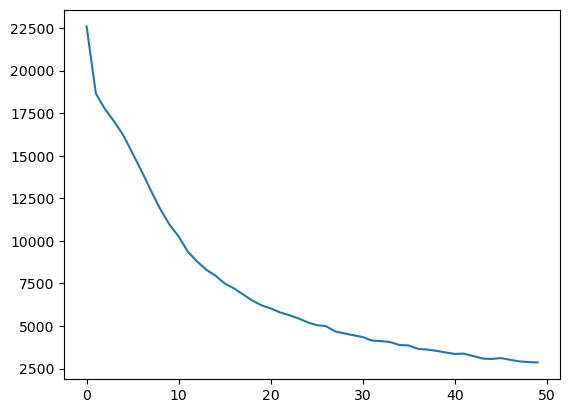

In [32]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Combination of RNN and CNN

## first model

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate


# Separating the features and target variable
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Autumn', 'season_Spring', 'season_Winter', 'season_Summer', 'year', 'month', 'day', 'day_of_year']
cnn_features = data.drop(['price'] + temporal_features_names, axis=1)
temporal_features = data[temporal_features_names]
target = data['price']

# Splitting dataset into training and testing sets
X_train_cnn, X_test_cnn, X_train_temporal, X_test_temporal, y_train, y_test = train_test_split(cnn_features, temporal_features, target, test_size=0.2, random_state=42)

# Normalizing the features
scaler_cnn = StandardScaler().fit(X_train_cnn)
X_train_cnn = scaler_cnn.transform(X_train_cnn)
X_test_cnn = scaler_cnn.transform(X_test_cnn)

scaler_temporal = StandardScaler().fit(X_train_temporal)
X_train_temporal = scaler_temporal.transform(X_train_temporal)
X_test_temporal = scaler_temporal.transform(X_test_temporal)

# Reshaping for CNN
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Defining the model
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(64, activation='relu')(cnn)

temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(64)(tf.expand_dims(temporal_input, -1))
rnn_output = Dense(64, activation='relu')(rnn)

combined = concatenate([cnn_output, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)

# Compilation of the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Summary of the model
model.summary()

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with Early Stopping
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=100, batch_size=64,verbose=1, callbacks=[early_stopping])

# Training the model
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=20, batch_size=64)

# To train the model, uncomment the model.fit line above and adjust epochs and batch_size as needed.

# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 165, 1)]     0           []                               
                                                                                                  
 conv1d_11 (Conv1D)             (None, 163, 64)      256         ['input_19[0][0]']               
                                                                                                  
 input_20 (InputLayer)          [(None, 11)]         0           []                               
                                                                                                  
 max_pooling1d_11 (MaxPooling1D  (None, 81, 64)      0           ['conv1d_11[0][0]']              
 )                                                                                          

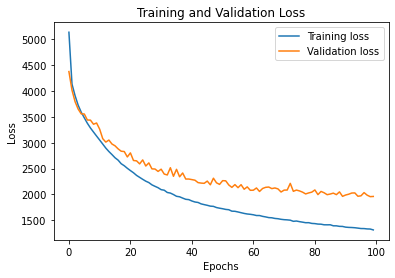

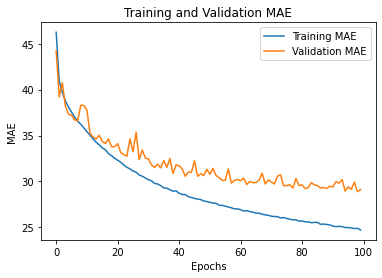

In [23]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


## out-of-time testing on initial model


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense


file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/oot_ANN_data.xlsx'
oot_data = pd.read_excel(file_path)

In [2]:
oot_data_copy = oot_data.copy()

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Layer


In [4]:
from tensorflow.keras.layers import Layer

class ExpandDimsLayer(Layer):
    def __init__(self, axis=-1, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)


## initial model


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, LSTM
from keras.callbacks import EarlyStopping
import tensorflow as tf

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Drop unnecessary columns
#oot_data_copy = oot_data_copy.drop(columns=[ "first_review", "last_review", "host_since", "host_response_time", "host_response_rate"])

# Get unique ids
all_ids = oot_data_copy['id'].unique()

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(all_ids, test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-09-12')  # Example: Adjust as needed

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

# Assuming these are your feature names
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Summer', 'season_Spring', 'season_Autumn', 'season_Winter']

# Preparing features for the neural network
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price']

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price']

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = StandardScaler().fit(temporal_features_train)
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)

# Reshaping for CNN
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Define inputs
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
temporal_input = Input(shape=(X_train_temporal.shape[1],))

# CNN pathway
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(64, activation='relu')(cnn)

# LSTM pathway with ExpandDimsLayer
temporal_processed = ExpandDimsLayer(axis=-1)(temporal_input)
rnn = LSTM(64)(temporal_processed)
rnn_output = Dense(64, activation='relu')(rnn)

# Combine CNN and LSTM outputs
combined = concatenate([cnn_output, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

# Construct the model
model = Model(inputs=[cnn_input, temporal_input], outputs=output)

# Continue with model compilation, fitting, and evaluation as before


# Compilation of the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Training the model with Early Stopping
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=50, batch_size=64, verbose=1, callbacks=[early_stopping])

# Evaluating the model on the out-of-time test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

model.summary()

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')



Epoch 1/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 18974.9453 - mae: 74.7899 - mse: 18974.9453 - val_loss: 14189.8105 - val_mae: 55.6851 - val_mse: 14185.5557
Epoch 2/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 10704.6562 - mae: 52.1168 - mse: 10704.6572 - val_loss: 13031.5371 - val_mae: 53.0911 - val_mse: 13027.6426
Epoch 3/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 9962.7949 - mae: 50.2518 - mse: 9962.7959 - val_loss: 12915.8408 - val_mae: 51.8273 - val_mse: 12912.2861
Epoch 4/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 9042.1514 - mae: 47.8207 - mse: 9042.1523 - val_loss: 14447.9883 - val_mae: 52.5797 - val_mse: 14444.9854
Epoch 5/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 8430.6738 - mae: 47.0047 - mse: 8430.6738 - val_loss: 12606.9961 - val_mae: 51.4200 - val_mse: 12603.8350
Epoch 6/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 8062.3765 - mae: 46.3788 - mse: 8062.3735 - val_loss: 13752.4375 - val_mae: 52.5914 - val_mse

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 170, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 168, 64)   │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 84, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expand_dims_layer   │ (None, 7, 1)      │          0 │ input_layer_1[0]… │
│ (ExpandDimsLayer)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 5376)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     16,896 │ expand_dims_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    344,128 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     16,512 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,146,245 (4.37 MB)

 Trainable params: 382,081 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 764,164 (2.92 MB)

Test Loss: 12503.185546875
Test MAE: 55.40755081176758
Test MSE: 12497.1396484375


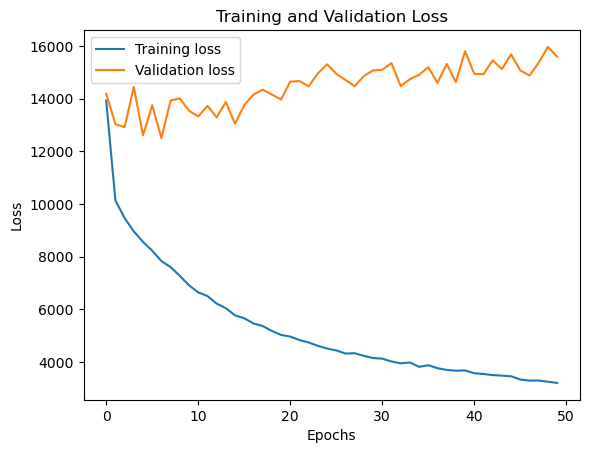

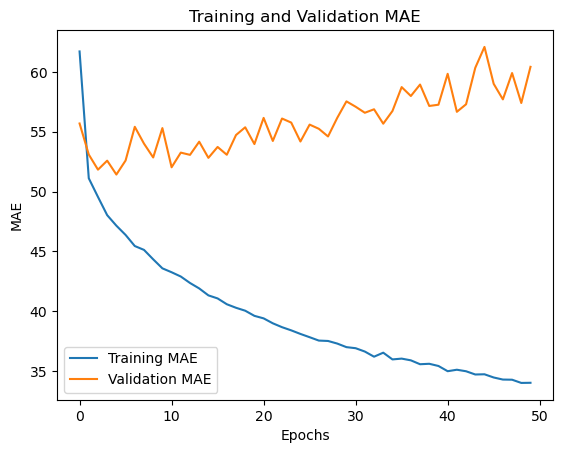

In [6]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


## added regularization and dropout layers

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, LSTM
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l1_l2

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Drop unnecessary columns
#oot_data_copy = oot_data_copy.drop(columns=[ "first_review", "last_review", "host_since", "host_response_time", "host_response_rate"])

# Get unique ids
all_ids = oot_data_copy['id'].unique()

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(all_ids, test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-09-12')  # Example: Adjust as needed

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

# Assuming these are your feature names
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Summer', 'season_Spring', 'season_Autumn', 'season_Winter']

# Preparing features for the neural network
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price']

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price']

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = StandardScaler().fit(temporal_features_train)
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)

# Reshaping for CNN
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Define inputs
cnn_input = Input(shape=(X_train_cnn.shape[1],))
temporal_input = Input(shape=(X_train_temporal.shape[1],))

# Adjust CNN pathway to a Dense network (MLP) with dropout for overfitting prevention
mlp = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(cnn_input)
mlp = Dropout(0.3)(mlp)
mlp = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(mlp)
mlp_output = Dropout(0.3)(mlp)

# LSTM pathway remains similar but includes Dropout
temporal_processed = ExpandDimsLayer(axis=-1)(temporal_input)
rnn = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(temporal_processed)
rnn_output = Dense(64, activation='relu')(rnn)

# Combine MLP and LSTM outputs
combined = concatenate([mlp_output, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with Early Stopping
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=50, batch_size=64, verbose=1, callbacks=[early_stopping])

# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Compute R-squared metric
y_pred = model.predict([X_test_cnn, X_test_temporal])
r_squared = r2_score(y_test, y_pred)

# Printing performance measures including R-squared
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test R-squared: {r_squared}')

Epoch 1/50
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 19021.6758 - mae: 73.4864 - mse: 18994.6055 - val_loss: 13780.2402 - val_mae: 57.2666 - val_mse: 13708.1992
Epoch 2/50
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 11518.5869 - mae: 54.7141 - mse: 11489.3838 - val_loss: 13364.5566 - val_mae: 55.8506 - val_mse: 13277.5469
Epoch 3/50
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 10568.7930 - mae: 52.6368 - mse: 10537.4014 - val_loss: 12936.7676 - val_mae: 55.4015 - val_mse: 12847.8691
Epoch 4/50
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 10266.1904 - mae: 51.6223 - mse: 10233.3418 - val_loss: 12474.8027 - val_mae: 52.7007 - val_mse: 12394.8613
Epoch 5/50
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 9468.4463 - mae: 50.3979 - mse: 9434.3516 - val_loss: 13103.8477 - val_mae: 53.3936 - val_mse: 13013.5947
Epoch 6/50
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 9152.0020 - mae: 49.9617 - mse: 9116.6670 - val_loss: 12291.8174 - val_mae: 52.9962 - val

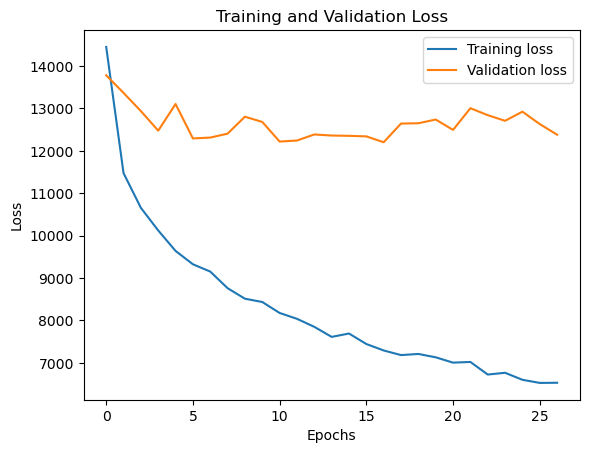

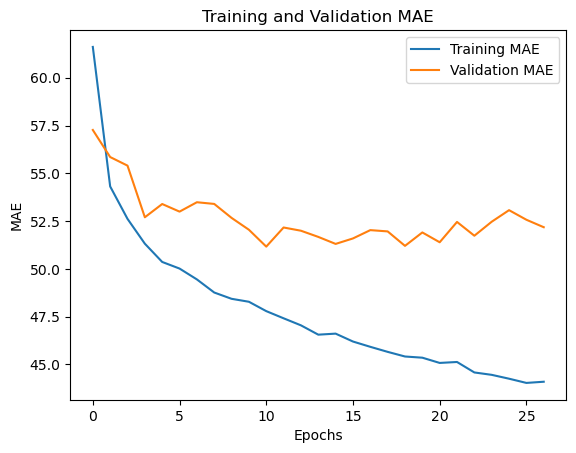

In [27]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## advanced model added layers

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, LSTM, Layer, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import tensorflow as tf

# Placeholder for your data loading step
# oot_data_copy = ...

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])
train_ids, test_ids = train_test_split(oot_data_copy['id'].unique(), test_size=0.3, random_state=42)

train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

cutoff_date = pd.to_datetime('2023-09-12')
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Summer', 'season_Spring', 'season_Autumn', 'season_Winter']

# Preprocessing features
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price']

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price']

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = MinMaxScaler().fit(temporal_features_train)  # Using MinMaxScaler for temporal features
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)

X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Model construction with extra layers
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Conv1D(filters=128, kernel_size=3, activation='relu')(cnn)  # Additional convolutional layer
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(128, activation='relu')(cnn)  # Enhanced density
cnn_output = Dropout(0.5)(cnn)  # Dropout to mitigate overfitting

temporal_input = Input(shape=(X_train_temporal.shape[1],))
temporal_processed = ExpandDimsLayer(axis=-1)(temporal_input)
rnn = LSTM(64, return_sequences=True)(temporal_processed)  # Enable stacking
rnn = LSTM(128)(rnn)  # Stacking LSTM for deeper temporal processing
rnn_output = Dense(128, activation='relu')(rnn)

combined = concatenate([cnn_output, rnn_output])
combined_dense = Dense(256, activation='relu')(combined)  # Increased model capacity
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=20, batch_size=64, verbose=1, callbacks=[early_stopping])

# Model evaluation
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)
y_pred = model.predict([X_test_cnn, X_test_temporal])
r_squared = r2_score(y_test, y_pred)

model.summary()

# Performance metrics
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test R-squared: {r_squared}')



Epoch 1/20
867/867 ━━━━━━━━━━━━━━━━━━━━ 57s 43ms/step - loss: 18894.1777 - mae: 75.1507 - mse: 18894.1797 - val_loss: 14188.5898 - val_mae: 56.2443 - val_mse: 14184.5137
Epoch 2/20
867/867 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - loss: 11356.2061 - mae: 54.8568 - mse: 11356.2070 - val_loss: 12971.7305 - val_mae: 54.6565 - val_mse: 12968.1992
Epoch 3/20
867/867 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - loss: 9784.2529 - mae: 51.3461 - mse: 9784.2529 - val_loss: 13283.8359 - val_mae: 52.4904 - val_mse: 13280.6875
Epoch 4/20
867/867 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - loss: 9432.6016 - mae: 50.8128 - mse: 9432.6016 - val_loss: 14166.1455 - val_mae: 53.1041 - val_mse: 14163.1924
Epoch 5/20
867/867 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - loss: 9265.0879 - mae: 50.5577 - mse: 9265.0879 - val_loss: 12953.7969 - val_mae: 51.6023 - val_mse: 12950.3828
Epoch 6/20
867/867 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - loss: 8487.1182 - mae: 48.3343 - mse: 8487.1182 - val_loss: 13139.4600 - val_mae: 52.2106 - val_mse

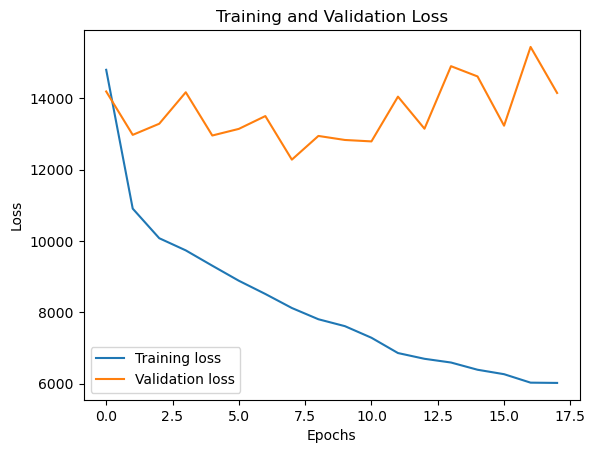

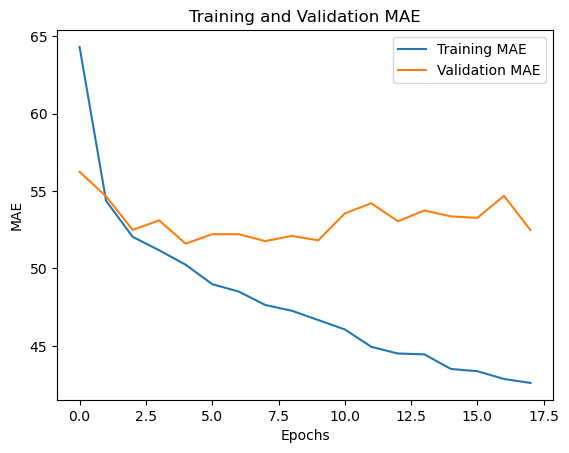

In [7]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## reduced model, less layers

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, LSTM
from keras.callbacks import EarlyStopping
import tensorflow as tf

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Drop unnecessary columns
#oot_data_copy = oot_data_copy.drop(columns=[ "first_review", "last_review", "host_since", "host_response_time", "host_response_rate"])

# Get unique ids
all_ids = oot_data_copy['id'].unique()

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(all_ids, test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-09-12')  # Example: Adjust as needed

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

# Assuming these are your feature names
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Summer', 'season_Spring', 'season_Autumn', 'season_Winter']

# Preparing features for the neural network
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price']

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price']

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = StandardScaler().fit(temporal_features_train)
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)

# Reshaping for CNN
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Simplified model definition
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
temporal_input = Input(shape=(X_train_temporal.shape[1],))

# CNN pathway simplified - keeping it as is since it's not overly complex
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(64, activation='relu')(cnn)

# LSTM pathway
temporal_processed = ExpandDimsLayer(axis=-1)(temporal_input)  # Correct usage of custom layer
rnn = LSTM(64)(temporal_processed)  # Kept one LSTM layer for simplicity
rnn_output = Dense(64, activation='relu')(rnn)

# Combine CNN and LSTM outputs
combined = concatenate([cnn_output, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)  # Simplified structure
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Early stopping setup remains unchanged
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=30, batch_size=64, verbose=1, callbacks=[early_stopping])

# Model evaluation
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)
y_pred = model.predict([X_test_cnn, X_test_temporal])
r_squared = r2_score(y_test, y_pred)

model.summary()

# Printing performance measures including R-squared
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test R-squared: {r_squared}')


Epoch 1/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 18988.2012 - mae: 74.7982 - mse: 18988.2031 - val_loss: 13944.5225 - val_mae: 57.0106 - val_mse: 13940.6484
Epoch 2/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 9843.0449 - mae: 51.2900 - mse: 9843.0449 - val_loss: 13355.4326 - val_mae: 53.6797 - val_mse: 13351.9443
Epoch 3/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 9321.2686 - mae: 49.4397 - mse: 9321.2695 - val_loss: 14576.3516 - val_mae: 52.5840 - val_mse: 14573.3682
Epoch 4/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 9441.5156 - mae: 49.0556 - mse: 9441.5146 - val_loss: 13596.3711 - val_mae: 52.7705 - val_mse: 13592.9668
Epoch 5/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 8140.1919 - mae: 46.6234 - mse: 8140.1914 - val_loss: 14023.8975 - val_mae: 52.0938 - val_mse: 14019.7959
Epoch 6/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 7863.2617 - mae: 46.3125 - mse: 7863.2598 - val_loss: 13385.2803 - val_mae: 51.3180 - val_mse: 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 170, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 168, 64)   │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 84, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expand_dims_layer   │ (None, 7, 1)      │          0 │ input_layer_1[0]… │
│ (ExpandDimsLayer)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 5376)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     16,896 │ expand_dims_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    344,128 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     16,512 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,146,245 (4.37 MB)

 Trainable params: 382,081 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 764,164 (2.92 MB)

Test Loss: 12790.267578125
Test MAE: 53.73429870605469
Test MSE: 12782.1796875
Test R-squared: 0.6036977975604019


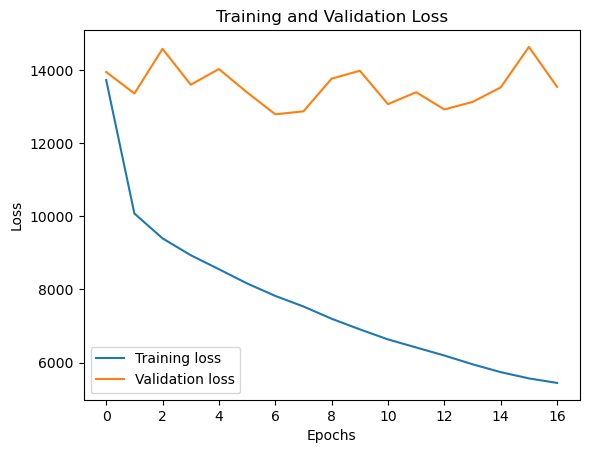

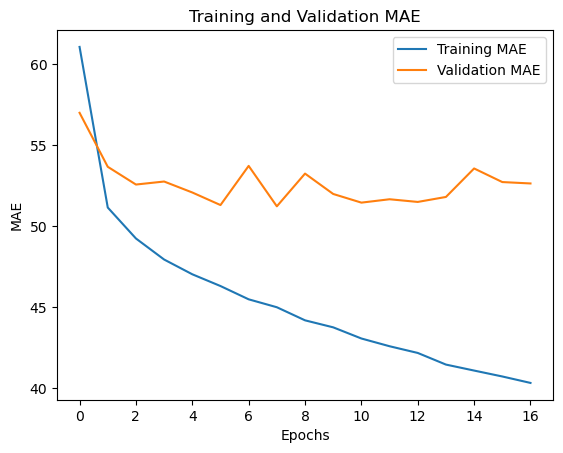

In [6]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## model with extra layers (no OOT testing)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate, Dropout

# Assuming X_train_cnn, X_train_temporal, y_train have been defined as before

# CNN Branch for non-temporal features
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Conv1D(filters=128, kernel_size=3, activation='relu')(cnn)  # Extra Conv layer
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(128, activation='relu')(cnn)
cnn_output = Dense(64, activation='relu')(cnn)  # Extra Dense layer

# RNN Branch for Temporal Features
temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(64, return_sequences=True)(tf.expand_dims(temporal_input, -1))  # Making LSTM return sequences
rnn = LSTM(32)(rnn)  # Extra LSTM layer
rnn_output = Dense(64, activation='relu')(rnn)  # Adjusted Dense layer

# Combining the branches
combined = concatenate([cnn_output, rnn_output])
combined = Dense(128, activation='relu')(combined)
combined = Dropout(0.5)(combined)  # Added Dropout for regularization
combined_dense = Dense(64, activation='relu')(combined)  # Extra Dense layer before final output
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)

# Compilation of the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Model summary
model.summary()

# Training the model
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=1)
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=20, batch_size=64, verbose=1)


# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 165, 1)]     0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 163, 64)      256         ['input_7[0][0]']                
                                                                                                  
 max_pooling1d_2 (MaxPooling1D)  (None, 81, 64)      0           ['conv1d_2[0][0]']               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 79, 128)      24704       ['max_pooling1d_2[0][0]']        
                                                                                            

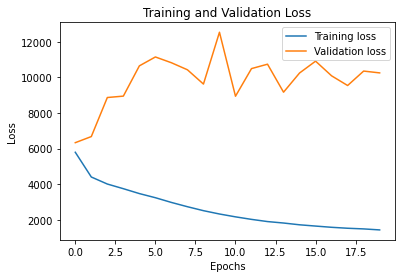

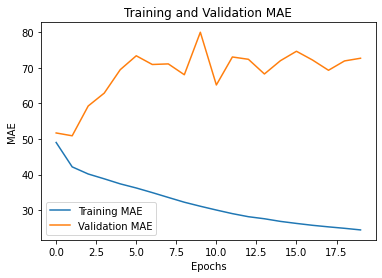

In [11]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## model with dropout, regularization and early stopping to prevent overftting

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Model definition
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Conv1D(filters=128, kernel_size=3, activation='relu')(cnn)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(128, activation='relu')(cnn)
cnn = Dropout(0.5)(cnn)  # Dropout added
cnn_output = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(cnn)  # L2 Regularization

temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(64, return_sequences=True)(tf.expand_dims(temporal_input, -1))
rnn = LSTM(32)(rnn)
rnn = Dropout(0.5)(rnn)  # Dropout added
rnn_output = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(rnn)  # L2 Regularization

combined = concatenate([cnn_output, rnn_output])
combined = Dense(128, activation='relu')(combined)
combined = Dropout(0.5)(combined)
combined_dense = Dense(64, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary()

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with Early Stopping
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=100, batch_size=64,verbose=1, callbacks=[early_stopping])

# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')



Epoch 1/100
2030/2030 [==============================] - 173s 80ms/step - loss: 6134.3970 - mae: 50.9236 - mse: 6133.5200 - val_loss: 9345.3828 - val_mae: 60.4635 - val_mse: 9344.5938
Epoch 2/100
2030/2030 [==============================] - 160s 79ms/step - loss: 4593.8652 - mae: 43.6701 - mse: 4593.0708 - val_loss: 10270.0723 - val_mae: 62.8991 - val_mse: 10269.2637
Epoch 3/100
2030/2030 [==============================] - 146s 72ms/step - loss: 4341.6338 - mae: 42.3758 - mse: 4340.8081 - val_loss: 13063.3896 - val_mae: 73.3625 - val_mse: 13062.5371
Epoch 4/100
2030/2030 [==============================] - 147s 72ms/step - loss: 4145.8433 - mae: 41.4906 - mse: 4144.9741 - val_loss: 10481.6035 - val_mae: 64.8965 - val_mse: 10480.6982
Epoch 5/100
2030/2030 [==============================] - 147s 72ms/step - loss: 3975.2012 - mae: 40.6873 - mse: 3974.2788 - val_loss: 11238.5107 - val_mae: 66.6883 - val_mse: 11237.5605
Epoch 6/100
2030/2030 [==============================] - 160s 79ms/step 

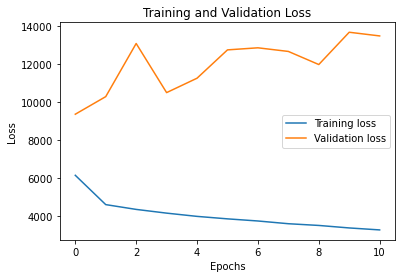

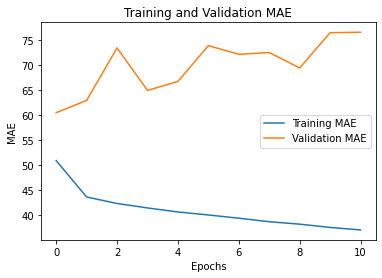

In [19]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## even more regularization and simplified model

In [16]:
from tensorflow.keras.layers import BatchNormalization

# Simplified model
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(64, activation='relu', kernel_regularizer=l2(0.02))(cnn)  # Increased L2 regularization
cnn = Dropout(0.5)(cnn)
cnn_output = Dense(32, activation='relu', kernel_regularizer=l2(0.02))(cnn)

temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(32, return_sequences=True)(tf.expand_dims(temporal_input, -1))
rnn = Dropout(0.5)(rnn)
rnn = LSTM(16)(rnn)
rnn = Dense(32, activation='relu', kernel_regularizer=l2(0.02))(rnn)
rnn_output = Dropout(0.5)(rnn)

combined = concatenate([cnn_output, rnn_output])
combined = BatchNormalization()(combined)
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.5)(combined)
output = Dense(1, activation='linear')(combined)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary()

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training with Early Stopping
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.3, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=100, batch_size=64,verbose=1, callbacks=[early_stopping])

# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')



Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 165, 1)]     0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 11)]         0           []                               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 163, 32)      128         ['input_13[0][0]']               
                                                                                                  
 tf.expand_dims_5 (TFOpLambda)  (None, 11, 1)        0           ['input_14[0][0]']               
                                                                                            

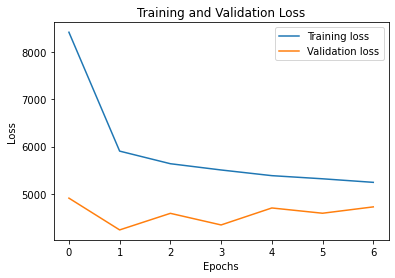

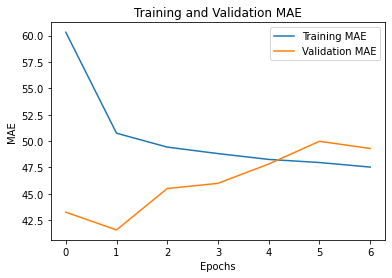

In [17]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# MultilayerPerceptron model

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

#insert file_path for the data
#file_path = 'H:/Documents/Merged data ANN.xlsx'
#read data, and quickly check if it is correctly read in
#data= pd.read_excel(file_path)
# Load the data from Excel

#data.drop(columns=["date"], inplace=True)

# Separate features and target variable
#X = data.drop(columns=["price"])  # Features
#y = data["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Multilayer Perceptron model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))

#additional hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test_scaled)

# Additional evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Epoch 1/50
2030/2030 [==============================] - 4s 1ms/step - loss: 5567.8525 - mse: 5567.8525
Epoch 2/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3883.0486 - mse: 3883.0486
Epoch 3/50
2030/2030 [==============================] - 3s 2ms/step - loss: 3684.4263 - mse: 3684.4263
Epoch 4/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3522.7344 - mse: 3522.7344
Epoch 5/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3379.0938 - mse: 3379.0938
Epoch 6/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3249.0664 - mse: 3249.0664
Epoch 7/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3119.2424 - mse: 3119.2424
Epoch 8/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3012.1328 - mse: 3012.1328
Epoch 9/50
2030/2030 [==============================] - 3s 2ms/step - loss: 2896.9395 - mse: 2896.9395
Epoch 10/50
2030/2030 [==============================] - 3s 1ms/step - lo

### kfold-cross validation

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Load the data from Excel
# Load the data from Excel
# data.drop(columns=["date"], inplace=True)

# Separate features and target variable
# X = data.drop(columns=["price"])  # Features
# y = data["price"]  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

mse_scores = []
rmse_scores = []
r2_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build the Multilayer Perceptron model
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=32, activation='relu'))

    # Additional hidden layers
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

    # Evaluate the model
    loss, mse = model.evaluate(X_test, y_test, verbose=1)
    predictions = model.predict(X_test)

    # Calculate additional evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate average scores across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print("Average Mean Squared Error:", avg_mse)
print("Average Root Mean Squared Error:", avg_rmse)
print("Average R-squared:", avg_r2)


1015/1015 [==============================] - 1s 944us/step
Average Mean Squared Error: 2171.663427734375
Average Root Mean Squared Error: 46.599229684386465
Average R-squared: 0.8490474173334949


### out of time testing

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense


oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Drop unnecessary columns
#oot_data_copy = oot_data_copy.drop(columns=[ "first_review", "last_review", "host_since", "host_response_time", "host_response_rate"])

# Get unique ids
all_ids = oot_data_copy['id'].unique()

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(all_ids, test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-09-12')  # Example: Adjust as needed

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]


# Separate features and target variable for both training and testing sets
X_train = train_data.drop(columns=['price', 'date'])  # Features for training
y_train = train_data['price']  # Target variable for training

X_test = test_data.drop(columns=['price', 'date'])  # Features for testing
y_test = test_data['price']  # Target variable for testing

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Multilayer Perceptron model
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(units=32, activation='relu'),
    # Additional hidden layers
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, verbose=1)

# Evaluate the model on the out-of-time test set
loss, mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Set:", mse)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Additional evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 24418.9922 - mse: 24418.9922
Epoch 2/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10603.5449 - mse: 10603.5459
Epoch 3/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10031.1670 - mse: 10031.1670
Epoch 4/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9586.3340 - mse: 9586.3330
Epoch 5/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9059.2480 - mse: 9059.2480
Epoch 6/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8369.1426 - mse: 8369.1406
Epoch 7/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7999.2979 - mse: 7999.2983
Epoch 8/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8329.7822 - mse: 8329.7832
Epoch 9/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7382.6094 - mse: 7382.6094
Epoch 10/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7009.9219 - mse: 7009.9214
Epoch 11/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6520.0352 - mse: 6520.0356
Epoch 12/50
867/867 ━━━━━━━━━━━━━━━

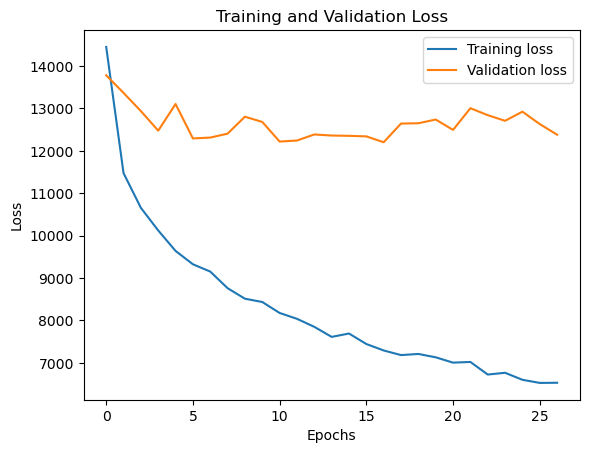

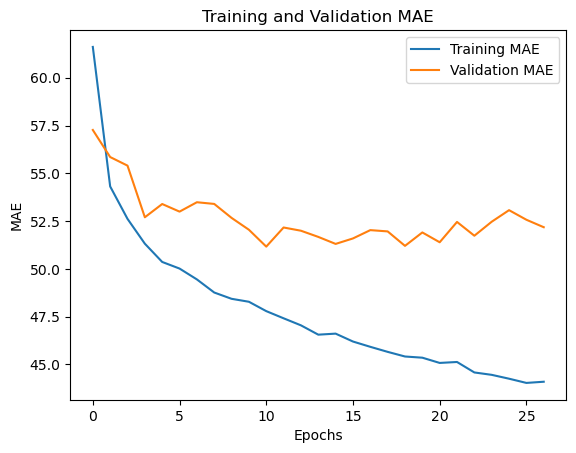

In [30]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# combination of MLP and RNN

## out-of-time validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense


file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/oot_ANN_data.xlsx'
oot_data = pd.read_excel(file_path)

In [7]:
oot_data_copy = oot_data.copy()

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Layer


In [9]:
class ExpandDimsLayer(Layer):
    def __init__(self, axis=-1, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Layer, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import r2_score

# Placeholder: Load your dataset into 'oot_data_copy'
# oot_data_copy = pd.read_csv('your_dataset.csv')

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(oot_data_copy['id'].unique(), test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-09-12')

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

# Assuming these are your feature names
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Summer', 'season_Spring', 'season_Autumn', 'season_Winter']

# Preparing features for the neural network
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price'].values

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price'].values

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = StandardScaler().fit(temporal_features_train)
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)


# Model definition
cnn_input = Input(shape=(X_train_cnn.shape[1],))
temporal_input = Input(shape=(X_train_temporal.shape[1],))

# MLP for tabular data
mlp = Dense(128, activation='relu')(cnn_input)
mlp = Dense(64, activation='relu')(mlp)
mlp_output = mlp  # No need for Flatten() as there's no Conv or MaxPooling layers

# LSTM for temporal data
temporal_processed = ExpandDimsLayer(axis=-1)(temporal_input)
rnn = LSTM(64)(temporal_processed)
rnn_output = Dense(64, activation='relu')(rnn)

# Combine MLP and LSTM outputs
combined = concatenate([mlp_output, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=50, batch_size=64, verbose=1, callbacks=[early_stopping])
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=30, batch_size=64, verbose=1, callbacks=[early_stopping])

# Model evaluation
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)
y_pred = model.predict([X_test_cnn, X_test_temporal])
r_squared = r2_score(y_test, y_pred)

# Performance metrics
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test R-squared: {r_squared}')


Epoch 1/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 18979.9414 - mae: 73.6008 - mse: 18979.9434 - val_loss: 14497.8271 - val_mae: 55.6246 - val_mse: 14494.1865
Epoch 2/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 9872.4902 - mae: 50.6205 - mse: 9872.4912 - val_loss: 12795.4512 - val_mae: 55.6439 - val_mse: 12791.0566
Epoch 3/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 8505.1416 - mae: 47.3985 - mse: 8505.1416 - val_loss: 13427.7109 - val_mae: 52.1879 - val_mse: 13424.3408
Epoch 4/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 8338.0186 - mae: 46.4678 - mse: 8338.0186 - val_loss: 12934.5586 - val_mae: 55.2386 - val_mse: 12930.3877
Epoch 5/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7354.4424 - mae: 44.5483 - mse: 7354.4429 - val_loss: 12412.7881 - val_mae: 53.5641 - val_mse: 12408.4697
Epoch 6/30
867/867 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6725.1689 - mae: 43.7290 - mse: 6725.1694 - val_loss: 12651.6846 - val_mae: 53.8564 - val_mse: 12646.8809
E

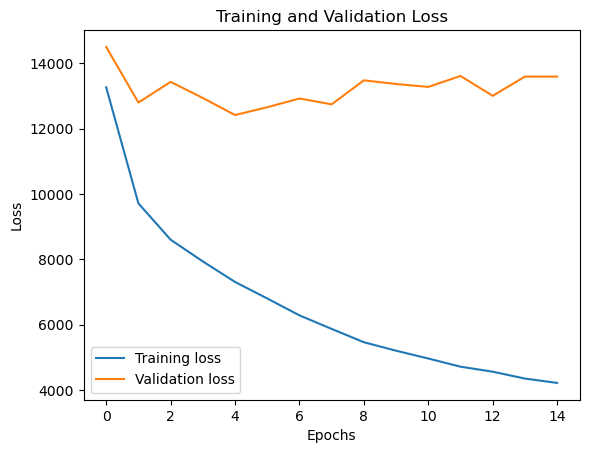

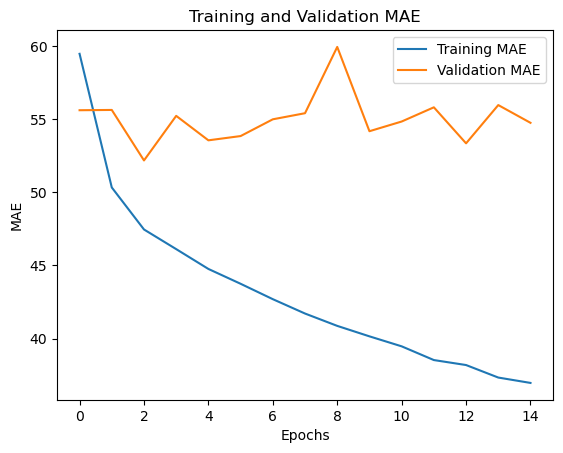

In [14]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## regularization, dropout layers against overfitting

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Layer, concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.regularizers import l2

# Placeholder: Load your dataset into 'oot_data_copy'
# oot_data_copy = pd.read_csv('your_dataset.csv')

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(oot_data_copy['id'].unique(), test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-11-24')

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

# Assuming these are your feature names
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Summer', 'season_Spring', 'season_Autumn', 'season_Winter']

# Preparing features for the neural network
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price'].values

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price'].values

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = StandardScaler().fit(temporal_features_train)
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)


# Model definition with dropout and regularization
cnn_input = Input(shape=(X_train_cnn.shape[1],))
temporal_input = Input(shape=(X_train_temporal.shape[1],))

# MLP for tabular data with Dropout and L2 regularization
mlp = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(cnn_input)
mlp = Dropout(0.5)(mlp)
mlp = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(mlp)
mlp = Dropout(0.5)(mlp)

# LSTM for temporal data with Dropout
temporal_processed = ExpandDimsLayer(axis=-1)(temporal_input)
rnn = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(temporal_processed)
rnn_output = Dense(64, activation='relu')(rnn)

# Combine MLP and LSTM outputs
combined = concatenate([mlp, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=50, batch_size=64, verbose=1, callbacks=[early_stopping])
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=30, batch_size=64, verbose=1, callbacks=[early_stopping])

# Model evaluation
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)
y_pred = model.predict([X_test_cnn, X_test_temporal])
r_squared = r2_score(y_test, y_pred)

# Performance metrics
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test R-squared: {r_squared}')

Epoch 1/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 96s 53ms/step - loss: 20756.4277 - mae: 75.9826 - mse: 20753.7129 - val_loss: 14418.0254 - val_mae: 58.7709 - val_mse: 14392.1855
Epoch 2/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 12961.6357 - mae: 57.9699 - mse: 12958.4678 - val_loss: 14053.4414 - val_mae: 55.5182 - val_mse: 14026.6553
Epoch 3/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 11478.7021 - mae: 54.9752 - mse: 11475.0391 - val_loss: 14140.8945 - val_mae: 53.8859 - val_mse: 14116.6865
Epoch 4/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 11514.6807 - mae: 54.8349 - mse: 11510.5898 - val_loss: 13002.0322 - val_mae: 54.1239 - val_mse: 12973.4727
Epoch 5/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 10675.9307 - mae: 53.2263 - mse: 10671.4902 - val_loss: 13089.1660 - val_mae: 56.2404 - val_mse: 13060.2354
Epoch 6/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 10662.1455 - mae: 53.4348 - mse: 10657.3223 - val_loss: 13222.0811 - val_mae: 53.0722

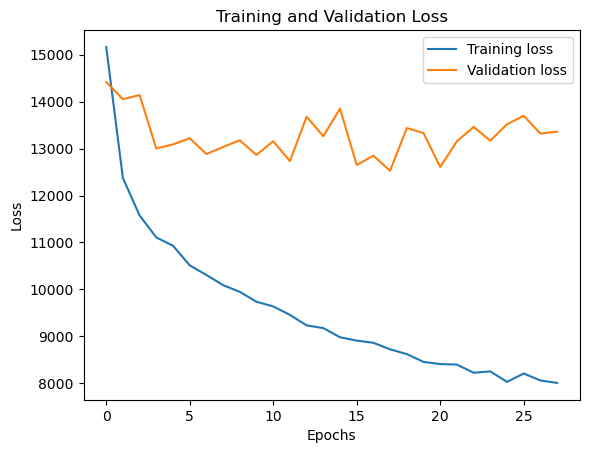

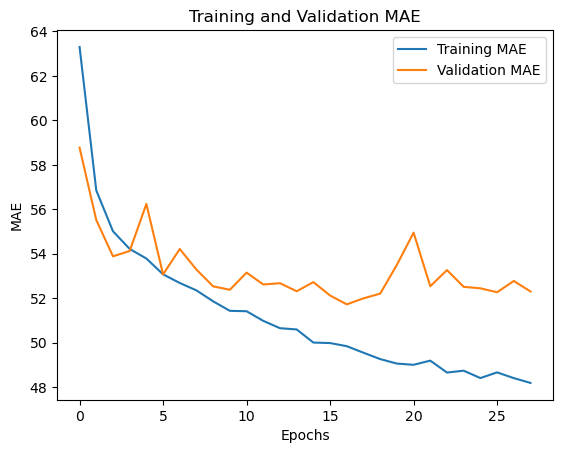

In [34]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## even more regularization

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Layer, concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.regularizers import l2

# Placeholder: Load your dataset into 'oot_data_copy'
# oot_data_copy = pd.read_csv('your_dataset.csv')

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(oot_data_copy['id'].unique(), test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-11-24')

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

# Assuming these are your feature names
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Summer', 'season_Spring', 'season_Autumn', 'season_Winter']

# Preparing features for the neural network
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price'].values

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price'].values

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = StandardScaler().fit(temporal_features_train)
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)

# Define inputs
cnn_input = Input(shape=(X_train_cnn.shape[1],))
temporal_input = Input(shape=(X_train_temporal.shape[1],))

# MLP for tabular data with increased Dropout and L2 regularization
mlp = Dense(128, activation='relu', kernel_regularizer=l2(0.02))(cnn_input)  # Increased L2 regularization
mlp = Dropout(0.6)(mlp)  # Increased dropout rate
mlp = Dense(64, activation='relu', kernel_regularizer=l2(0.02))(mlp)
#mlp = Dropout(0.6)(mlp)  # Apply dropout again

# LSTM for temporal data with increased dropout
# Using both dropout and recurrent_dropout to regularize the LSTM layer
temporal_processed = ExpandDimsLayer(axis=-1)(temporal_input)
rnn = LSTM(64, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=l2(0.02))(temporal_processed)  # Increased dropout and added L2 regularization
rnn_output = Dense(64, activation='relu', kernel_regularizer=l2(0.02))(rnn)  # Increased L2 regularization

# Combine MLP and LSTM outputs with dropout in between
combined = concatenate([mlp, rnn_output])
#combined = Dropout(0.5)(combined)  # Additional dropout before the final dense layer
combined_dense = Dense(128, activation='relu', kernel_regularizer=l2(0.02))(combined)  # Further L2 regularization
output = Dense(1, activation='linear', kernel_regularizer=l2(0.02))(combined_dense)  # Output layer with L2 regularization

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Model training
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=50, batch_size=64, verbose=1, callbacks=[early_stopping])
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=30, batch_size=64, verbose=1, callbacks=[early_stopping])

# Model evaluation
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)
y_pred = model.predict([X_test_cnn, X_test_temporal])
r_squared = r2_score(y_test, y_pred)

# Performance metrics
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test R-squared: {r_squared}')

Epoch 1/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 18348.2539 - mae: 73.4620 - mse: 18338.6504 - val_loss: 14986.9102 - val_mae: 56.4975 - val_mse: 14954.1641
Epoch 2/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 12182.5957 - mae: 55.9126 - mse: 12172.1855 - val_loss: 13615.4297 - val_mae: 55.5800 - val_mse: 13578.1299
Epoch 3/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 11537.8086 - mae: 54.7698 - mse: 11526.1533 - val_loss: 14347.1611 - val_mae: 54.3900 - val_mse: 14309.5479
Epoch 4/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 11459.9336 - mae: 54.1818 - mse: 11447.0361 - val_loss: 13523.4688 - val_mae: 54.0083 - val_mse: 13486.1035
Epoch 5/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 11181.0264 - mae: 52.9940 - mse: 11167.0117 - val_loss: 13711.3799 - val_mae: 53.1669 - val_mse: 13671.9375
Epoch 6/30
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 10568.2041 - mae: 52.0098 - mse: 10553.1123 - val_loss: 12961.6602 - val_mae: 52.8085 -

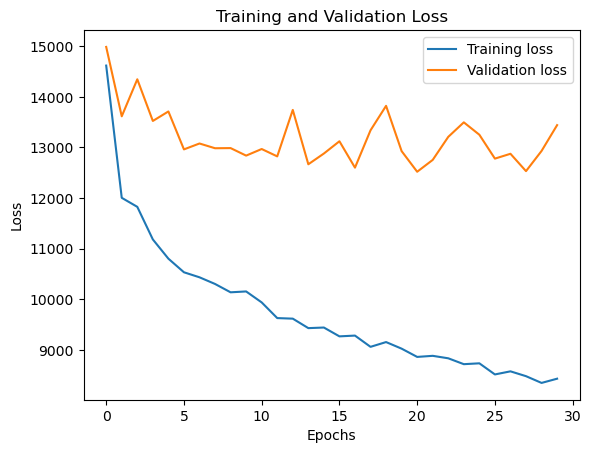

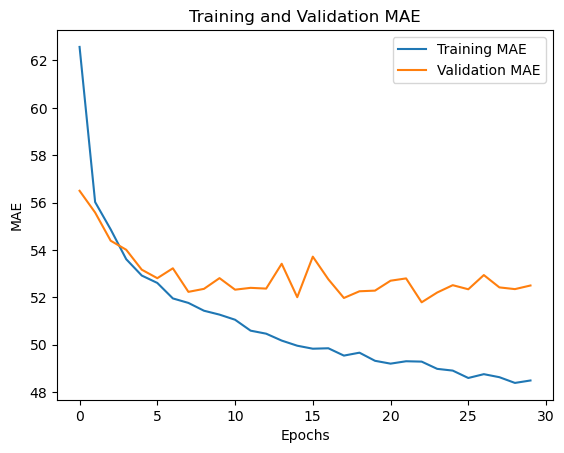

In [36]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# CNN

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

#insert file_path for the data
#file_path = 'H:/Documents/Merged data ANN.xlsx'
#read data, and quickly check if it is correctly read in
#data= pd.read_excel(file_path)
# Load the data from Excel

#data.drop(columns=["date"], inplace=True)

# Separate features and target variable
#X = data.drop(columns=["price"])  # Features
#y = data["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN (add an additional dimension)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

#extra hidden layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_reshaped, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test_reshaped)

# Additional evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Epoch 1/50
4059/4059 [==============================] - 25s 6ms/step - loss: 5182.0083 - mae: 47.0001
Epoch 2/50
4059/4059 [==============================] - 24s 6ms/step - loss: 4110.0288 - mae: 40.7656
Epoch 3/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3888.7305 - mae: 39.6066
Epoch 4/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3722.6101 - mae: 38.6810
Epoch 5/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3577.6919 - mae: 37.8857
Epoch 6/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3455.2400 - mae: 37.2726
Epoch 7/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3340.5276 - mae: 36.6472
Epoch 8/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3207.7732 - mae: 35.9574
Epoch 9/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3091.1262 - mae: 35.3685
Epoch 10/50
4059/4059 [==============================] - 24s 6ms/step - loss: 2990

# GraphCNN

In [14]:
!pip install pandas numpy scikit-learn keras spektral

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Model
from keras.layers import Input, Dense
from spektral.layers import GraphConv


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the GraphCNN model
input_layer = Input(shape=(X_train_scaled.shape[1],))
graph_conv = GraphConv(64, activation='relu')([input_layer, input_layer])
dense1 = Dense(units=32, activation='relu')(graph_conv)
output_layer = Dense(units=1)(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test_scaled)

# Additional evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


ImportError: cannot import name 'GraphConvS' from 'spektral.layers' (C:\Program Files\Anaconda3\lib\site-packages\spektral\layers\__init__.py)

# spatial neural network model with out-of-time testing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense


file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/oot_ANN_data.xlsx'
oot_data = pd.read_excel(file_path)

In [ ]:
oot_data_copy = oot_data.copy()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

In [ ]:
class ExpandDimsLayer(Layer):
    def __init__(self, axis=-1, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'oot_data_copy' is already loaded and contains the necessary columns

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Split ids into training and testing sets based on unique identifiers
train_ids, test_ids = train_test_split(oot_data_copy['id'].unique(), test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-11-24')

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]


spatial_features_list = [
    'latitude', 'longitude', 'neighbourhood_Batignolles-Monceau', 'neighbourhood_Bourse',
    'neighbourhood_Buttes-Chaumont', 'neighbourhood_Buttes-Montmartre', 'neighbourhood_Entrepôt',
    'neighbourhood_Gobelins', 'neighbourhood_Hôtel-de-Ville', 'neighbourhood_Louvre',
    'neighbourhood_Luxembourg', 'neighbourhood_Ménilmontant', 'neighbourhood_Observatoire',
    'neighbourhood_Opéra', 'neighbourhood_Palais-Bourbon', 'neighbourhood_Panthéon',
    'neighbourhood_Passy', 'neighbourhood_Popincourt', 'neighbourhood_Reuilly', 'neighbourhood_Temple',
    'neighbourhood_Vaugirard', 'neighbourhood_Élysée', 'Eiffel Tower Distance', 
    'Louvre Museum Distance', 'Notre-Dame Cathedral Distance', 'Sacré-Cœur Basilica Distance',
    'Arc de Triomphe Distance'
]

# Assuming the list of spatial features as 'spatial_features_list' remains unchanged
X_train = train_data[spatial_features_list]
y_train = train_data['price'].values

X_test = test_data[spatial_features_list]
y_test = test_data['price'].values

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define neural network model
input_layer = Input(shape=(X_train_scaled.shape[1],), name='Input_Layer')
x = Dense(128, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.3)(x)
output_layer = Dense(1, activation='linear', name='Output_Layer')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error', 
              metrics=['mse', 'mae'])

model.summary()

# Train the model with validation data set as the out-of-time test set
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=64, verbose=1)

# Evaluate the model on the out-of-time test set
performance = model.evaluate(X_test_scaled, y_test, verbose=1)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Compute evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R-squared: {r2}')


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 35930.1172 - mae: 115.2751 - mse: 35928.2109 - val_loss: 28701.7871 - val_mae: 90.8392 - val_mse: 28675.8457
Epoch 2/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25540.6875 - mae: 91.7948 - mse: 25537.6914 - val_loss: 28597.7031 - val_mae: 90.2298 - val_mse: 28572.8281
Epoch 3/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25498.0332 - mae: 91.3416 - mse: 25494.8984 - val_loss: 28554.7773 - val_mae: 90.5606 - val_mse: 28529.7402
Epoch 4/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 25358.4609 - mae: 90.9140 - mse: 25355.2324 - val_loss: 28463.9707 - val_mae: 92.4415 - val_mse: 28439.6855
Epoch 5/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 24646.5039 - mae: 90.7095 - mse: 24643.1699 - val_loss: 28529.3594 - val_mae: 91.8699 - val_mse: 28505.2812
Epoch 6/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 24849.3750 - mae: 90.6208 - mse: 24845.9395 - val_loss: 28489.4160 - val_mae: 93.2689 -

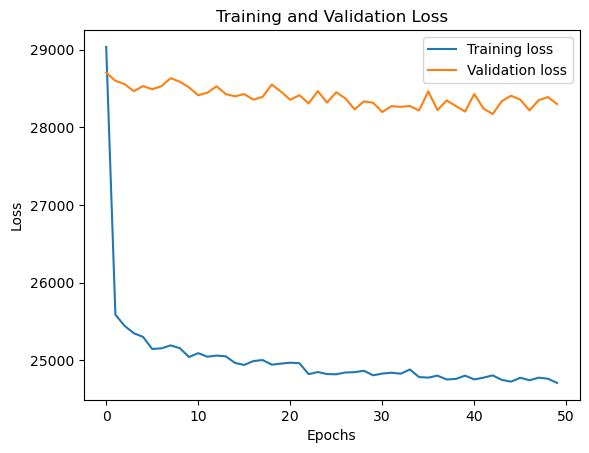

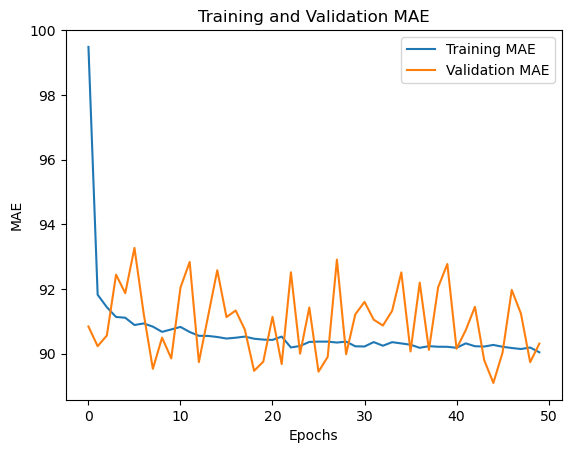

In [39]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

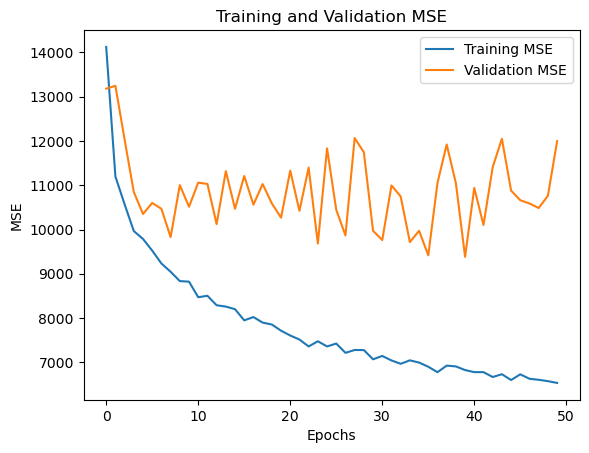

In [56]:
import matplotlib.pyplot as plt

# Plotting training and validation MSE
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()




## adding r-squared plot

In [42]:
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import Callback

class R2ScoreCallback(Callback):
    def __init__(self, train_data, val_data):
        super().__init__()
        self.train_data = train_data
        self.val_data = val_data
        self.r2_scores = {'train': [], 'val': []}

    def on_epoch_end(self, epoch, logs=None):
        # Predictions for training data
        train_predictions = self.model.predict(self.train_data[0])
        train_r2_score = r2_score(self.train_data[1], train_predictions)
        self.r2_scores['train'].append(train_r2_score)

        # Predictions for validation data
        val_predictions = self.model.predict(self.val_data[0])
        val_r2_score = r2_score(self.val_data[1], val_predictions)
        self.r2_scores['val'].append(val_r2_score)

        # Optionally, log the R-squared scores
        print(f'\nEpoch {epoch+1}, Training R2: {train_r2_score:.4f}, Validation R2: {val_r2_score:.4f}')


In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'oot_data_copy' is already loaded and contains the necessary columns

oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

# Split ids into training and testing sets based on unique identifiers
train_ids, test_ids = train_test_split(oot_data_copy['id'].unique(), test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = oot_data_copy[oot_data_copy['id'].isin(train_ids)]
test_selected = oot_data_copy[oot_data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-11-24')

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]


spatial_features_list = [
    'latitude', 'longitude', 'neighbourhood_Batignolles-Monceau', 'neighbourhood_Bourse',
    'neighbourhood_Buttes-Chaumont', 'neighbourhood_Buttes-Montmartre', 'neighbourhood_Entrepôt',
    'neighbourhood_Gobelins', 'neighbourhood_Hôtel-de-Ville', 'neighbourhood_Louvre',
    'neighbourhood_Luxembourg', 'neighbourhood_Ménilmontant', 'neighbourhood_Observatoire',
    'neighbourhood_Opéra', 'neighbourhood_Palais-Bourbon', 'neighbourhood_Panthéon',
    'neighbourhood_Passy', 'neighbourhood_Popincourt', 'neighbourhood_Reuilly', 'neighbourhood_Temple',
    'neighbourhood_Vaugirard', 'neighbourhood_Élysée', 'Eiffel Tower Distance', 
    'Louvre Museum Distance', 'Notre-Dame Cathedral Distance', 'Sacré-Cœur Basilica Distance',
    'Arc de Triomphe Distance'
]

# Assuming the list of spatial features as 'spatial_features_list' remains unchanged
X_train = train_data[spatial_features_list]
y_train = train_data['price'].values

X_test = test_data[spatial_features_list]
y_test = test_data['price'].values

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define neural network model
input_layer = Input(shape=(X_train_scaled.shape[1],), name='Input_Layer')
x = Dense(128, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.3)(x)
output_layer = Dense(1, activation='linear', name='Output_Layer')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error', 
              metrics=['mse', 'mae'])

model.summary()

# Prepare the callback with training and validation data
r2_callback = R2ScoreCallback(train_data=(X_train_scaled, y_train), val_data=(X_test_scaled, y_test))

# Train the model
history = model.fit(
    X_train_scaled, 
    y_train, 
    validation_data=(X_test_scaled, y_test),
    epochs=50, 
    batch_size=64, 
    verbose=1, 
    callbacks=[r2_callback]  # Include the R2ScoreCallback
)
# Evaluate the model on the out-of-time test set
performance = model.evaluate(X_test_scaled, y_test, verbose=1)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Compute evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R-squared: {r2}')

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Epoch 1, Training R2: 0.1174, Validation R2: 0.1158
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 35010.2500 - mae: 114.8275 - mse: 35008.3789 - val_loss: 28660.8164 - val_mae: 90.8301 - val_mse: 28635.4609
Epoch 2/50
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step

Epoch 2, Training R2: 0.1201, Validation R2: 0.1186
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 24917.2891 - mae: 91.0319 - mse: 24914.3438 - val_loss: 28570.3281 - val_mae: 91.0168 - val_mse: 28545.1621
Epoch 3/50
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Epoch 3, Training R2: 0.1194, Validation R2: 0.1193
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 24838.9805 - mae: 90.5689 - mse: 24835.8359 - val_loss: 28544.6133 - val_mae: 93.2401 - val_mse: 28520.5508
Epoch 4/50
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
454/454 ━━━━━━━━━━━

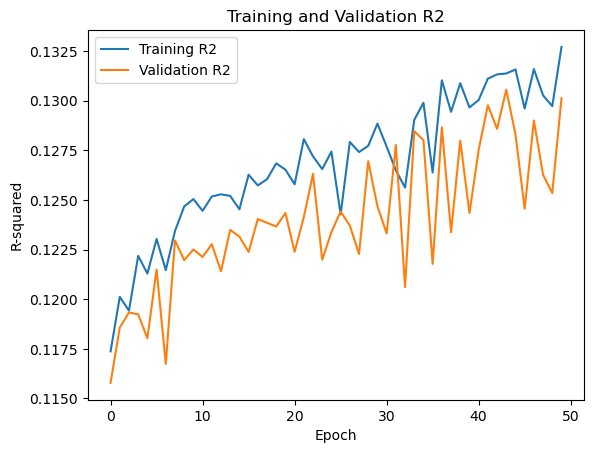

In [44]:
import matplotlib.pyplot as plt

# Plotting R-squared history
plt.plot(r2_callback.r2_scores['train'], label='Training R2')
plt.plot(r2_callback.r2_scores['val'], label='Validation R2')
plt.title('Training and Validation R2')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()
plt.show()


## combined spatial and RNN with out-of-time-testing

In [51]:
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import Callback

class R2ScoreCallback(Callback):
    def __init__(self, train_data, val_data):
        super().__init__()
        self.train_data = train_data  # ([X_train_spatial, X_train_temporal], y_train)
        self.val_data = val_data      # ([X_test_spatial, X_test_temporal], y_test)
        self.r2_scores = {'train': [], 'val': []}

    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(self.train_data[0])
        train_r2 = r2_score(self.train_data[1], y_train_pred)
        self.r2_scores['train'].append(train_r2)

        y_val_pred = self.model.predict(self.val_data[0])
        val_r2 = r2_score(self.val_data[1], y_val_pred)
        self.r2_scores['val'].append(val_r2)

        print(f'Epoch {epoch+1}: Train R2: {train_r2:.4f}, Validation R2: {val_r2:.4f}')


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, concatenate, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming 'oot_data_copy' is already loaded and preprocessed accordingly
oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

cutoff_date = pd.Timestamp('2023-11-24')
train_data = oot_data_copy[oot_data_copy['date'] < cutoff_date]
test_data = oot_data_copy[oot_data_copy['date'] >= cutoff_date]

# Define temporal and spatial features
temporal_features_list = [
    'weekday', 'is_holiday', 'is_school_holiday', 'season_Autumn', 'season_Spring',
    'season_Winter', 'season_Summer', 'year', 'month', 'day', 'day_of_year'
]
spatial_features_list = list(set(oot_data_copy.columns) - set(temporal_features_list + ['date', 'price', 'id']))

# Splitting features and target
X_train_spatial = train_data[spatial_features_list]
X_test_spatial = test_data[spatial_features_list]
X_train_temporal = train_data[temporal_features_list]
X_test_temporal = test_data[temporal_features_list]
y_train = train_data['price'].values
y_test = test_data['price'].values

# Feature scaling
scaler_spatial = StandardScaler().fit(X_train_spatial)
X_train_spatial_scaled = scaler_spatial.transform(X_train_spatial)
X_test_spatial_scaled = scaler_spatial.transform(X_test_spatial)

scaler_temporal = StandardScaler().fit(X_train_temporal)
X_train_temporal_scaled = scaler_temporal.transform(X_train_temporal)
X_test_temporal_scaled = scaler_temporal.transform(X_test_temporal)

# Reshape temporal features for LSTM input
X_train_temporal_scaled = X_train_temporal_scaled.reshape((X_train_temporal_scaled.shape[0], X_train_temporal_scaled.shape[1], 1))
X_test_temporal_scaled = X_test_temporal_scaled.reshape((X_test_temporal_scaled.shape[0], X_test_temporal_scaled.shape[1], 1))

# Model architecture
input_spatial = Input(shape=(X_train_spatial_scaled.shape[1],), name='Spatial_Input')
x_spatial = Dense(128, activation='relu')(input_spatial)
x_spatial = BatchNormalization()(x_spatial)
x_spatial = Dropout(0.3)(x_spatial)
x_spatial = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_spatial)
x_spatial = Dropout(0.3)(x_spatial)
spatial_output = Dense(32, activation='relu', name='Spatial_Output')(x_spatial)

input_temporal = Input(shape=(X_train_temporal_scaled.shape[1], 1), name='Temporal_Input')
x_temporal = LSTM(64)(input_temporal)
temporal_output = Dense(32, activation='relu', name='Temporal_Output')(x_temporal)

combined = concatenate([spatial_output, temporal_output])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.3)(combined)
output = Dense(1, activation='linear', name='Output')(combined)

model = Model(inputs=[input_spatial, input_temporal], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Train the model
#history = model.fit(
#    [X_train_spatial_scaled, X_train_temporal_scaled], y_train,
#    validation_data=([X_test_spatial_scaled, X_test_temporal_scaled], y_test),
#    epochs=30, batch_size=64, verbose=1
#)

# Instantiate the R2ScoreCallback with the appropriate data
r2_callback = R2ScoreCallback(
    train_data=([X_train_spatial_scaled, X_train_temporal_scaled], y_train),
    val_data=([X_test_spatial_scaled, X_test_temporal_scaled], y_test)
)

# Fit the model with the custom callback
history = model.fit(
    [X_train_spatial_scaled, X_train_temporal_scaled], y_train,
    validation_data=([X_test_spatial_scaled, X_test_temporal_scaled], y_test),
    epochs=50, batch_size=64, verbose=1,
    callbacks=[r2_callback]
)




# Model evaluation
test_loss, test_mse, test_mae = model.evaluate([X_test_spatial_scaled, X_test_temporal_scaled], y_test, verbose=1)
y_pred = model.predict([X_test_spatial_scaled, X_test_temporal_scaled])
test_r_squared = r2_score(y_test, y_pred)

# Performance metrics
print(f'Test Loss: {test_loss}')
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R-squared: {test_r_squared}')



Epoch 1/50
3481/3481 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Epoch 1: Train R2: 0.6507, Validation R2: 0.6102
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 18158.7188 - mae: 70.7169 - mse: 18157.6484 - val_loss: 12370.8320 - val_mae: 53.5494 - val_mse: 12373.5654
Epoch 2/50
3481/3481 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Epoch 2: Train R2: 0.6695, Validation R2: 0.5911
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - loss: 11532.2402 - mae: 55.7151 - mse: 11530.9072 - val_loss: 12970.8203 - val_mae: 52.1908 - val_mse: 12977.4482
Epoch 3/50
3481/3481 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Epoch 3: Train R2: 0.6912, Validation R2: 0.6187
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - loss: 10662.0557 - mae: 53.7940 - mse: 10660.5371 - val_loss: 12096.2734 - val_mae: 50.8535 - val_mse: 12103.7539
Epoch 4/50
3481/3481 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1515/1515 ━━━━━━━━━━━

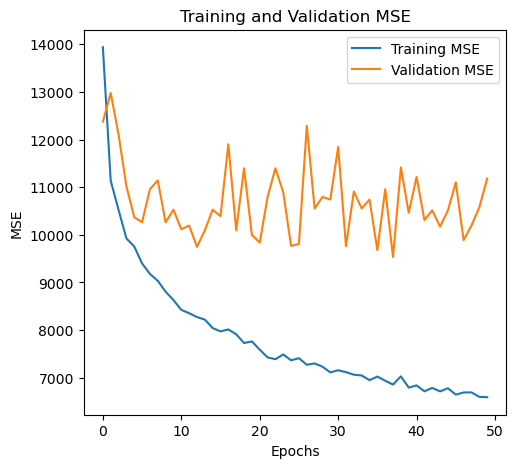

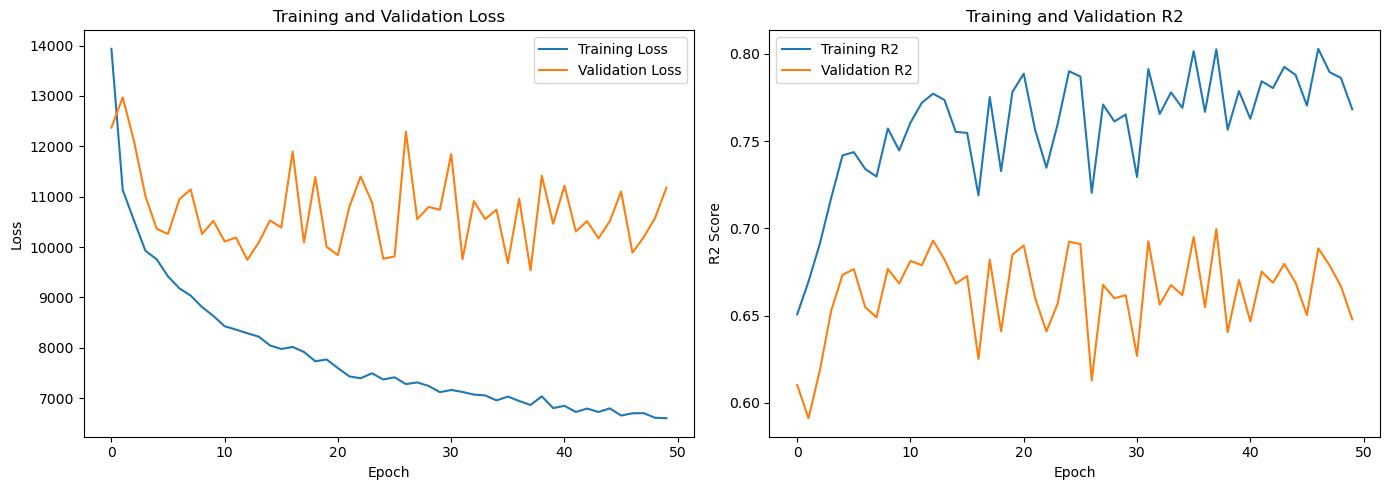

In [53]:
# Plotting MSE and R-squared
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Plotting training/validation loss and R-squared
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r2_callback.r2_scores['train'], label='Training R2')
plt.plot(r2_callback.r2_scores['val'], label='Validation R2')
plt.title('Training and Validation R2')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


## added regularization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, concatenate, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assuming 'oot_data_copy' is already loaded and preprocessed accordingly
oot_data_copy['date'] = pd.to_datetime(oot_data_copy[['year', 'month', 'day']])

cutoff_date = pd.Timestamp('2023-11-24')
train_data = oot_data_copy[oot_data_copy['date'] < cutoff_date]
test_data = oot_data_copy[oot_data_copy['date'] >= cutoff_date]

# Define temporal and spatial features
temporal_features_list = [
    'weekday', 'is_holiday', 'is_school_holiday', 'season_Autumn', 'season_Spring',
    'season_Winter', 'season_Summer', 'year', 'month', 'day', 'day_of_year'
]
spatial_features_list = list(set(oot_data_copy.columns) - set(temporal_features_list + ['date', 'price', 'id']))

# Splitting features and target
X_train_spatial = train_data[spatial_features_list]
X_test_spatial = test_data[spatial_features_list]
X_train_temporal = train_data[temporal_features_list]
X_test_temporal = test_data[temporal_features_list]
y_train = train_data['price'].values
y_test = test_data['price'].values

# Feature scaling
scaler_spatial = StandardScaler().fit(X_train_spatial)
X_train_spatial_scaled = scaler_spatial.transform(X_train_spatial)
X_test_spatial_scaled = scaler_spatial.transform(X_test_spatial)

scaler_temporal = StandardScaler().fit(X_train_temporal)
X_train_temporal_scaled = scaler_temporal.transform(X_train_temporal)
X_test_temporal_scaled = scaler_temporal.transform(X_test_temporal)

# Reshape temporal features for LSTM input
X_train_temporal_scaled = X_train_temporal_scaled.reshape((X_train_temporal_scaled.shape[0], X_train_temporal_scaled.shape[1], 1))
X_test_temporal_scaled = X_test_temporal_scaled.reshape((X_test_temporal_scaled.shape[0], X_test_temporal_scaled.shape[1], 1))

# Model architecture with adjusted dropout and L2 regularization
input_spatial = Input(shape=(X_train_spatial_scaled.shape[1],), name='Spatial_Input')
x_spatial = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input_spatial)
x_spatial = BatchNormalization()(x_spatial)
x_spatial = Dropout(0.5)(x_spatial)  # Increased dropout
x_spatial = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_spatial)
x_spatial = Dropout(0.5)(x_spatial)  # Increased dropout
spatial_output = Dense(32, activation='relu', name='Spatial_Output')(x_spatial)

input_temporal = Input(shape=(X_train_temporal_scaled.shape[1], 1), name='Temporal_Input')
x_temporal = LSTM(64, dropout=0.5, recurrent_dropout=0.5)(input_temporal)  # Added dropout to LSTM
temporal_output = Dense(32, activation='relu', name='Temporal_Output')(x_temporal)

combined = concatenate([spatial_output, temporal_output])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.5)(combined)  # Increased dropout
output = Dense(1, activation='linear', name='Output')(combined)

model = Model(inputs=[input_spatial, input_temporal], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(
    [X_train_spatial_scaled, X_train_temporal_scaled], y_train,
    validation_data=([X_test_spatial_scaled, X_test_temporal_scaled], y_test),
    epochs=50, batch_size=64, verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_mse, test_mae = model.evaluate([X_test_spatial_scaled, X_test_temporal_scaled], y_test, verbose=1)
y_pred = model.predict([X_test_spatial_scaled, X_test_temporal_scaled])
test_r_squared = r2_score(y_test, y_pred)

# Performance metrics
print(f'Test Loss: {test_loss}')
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R-squared: {test_r_squared}')



Epoch 1/50


Exception ignored in: <function AtomicFunction.__del__ at 0x000001E297AC2520>
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\tensorflow\python\eager\polymorphic_function\atomic_function.py", line 300, in __del__
    RUNTIME_FUNCTION_REFS.pop(key)
KeyboardInterrupt: 


1741/1741 ━━━━━━━━━━━━━━━━━━━━ 326s 16ms/step - loss: 20523.5215 - mae: 76.5726 - mse: 20520.9395 - val_loss: 13750.4893 - val_mae: 57.0001 - val_mse: 13752.0781
Epoch 2/50
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 13602.8633 - mae: 61.7828 - mse: 13599.7158 - val_loss: 12795.4736 - val_mae: 55.0922 - val_mse: 12795.5977
Epoch 3/50
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 12750.4854 - mae: 60.3053 - mse: 12746.7393 - val_loss: 12847.8896 - val_mae: 53.9759 - val_mse: 12850.9814
Epoch 4/50
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 12617.0225 - mae: 59.3969 - mse: 12612.7061 - val_loss: 12209.6904 - val_mae: 52.3043 - val_mse: 12214.2402
Epoch 5/50
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - loss: 12368.8496 - mae: 58.5119 - mse: 12363.9482 - val_loss: 12148.0420 - val_mae: 53.1029 - val_mse: 12151.6514
Epoch 6/50
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 11706.2695 - mae: 57.5308 - mse: 11700.8516 - val_loss: 12693.1250 - val_mae: 53.2163 

In [ ]:
# Plotting MSE and R-squared over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
# Assuming test_r_squared is calculated for each epoch in a similar callback approach or post-training for simplicity here
plt.plot([test_r_squared] * len(history.history['mse']), label='Test R-squared', color='red')
plt.title('Test R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()

plt.tight_layout()
plt.show()


# Spatial en MLP combined neural network